In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Modelization
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df_train = pd.read_csv("https://kaggle-getting-started.s3-ap-northeast-1.amazonaws.com/titanic/train.csv")
df_test = pd.read_csv("https://kaggle-getting-started.s3-ap-northeast-1.amazonaws.com/titanic/test.csv")
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df_data = pd.concat([df_train, df_test])

In [4]:
df_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# 特徵工程

,Sex,Survived
0,female,0.742
1,male,0.189


C:\Users\chiay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

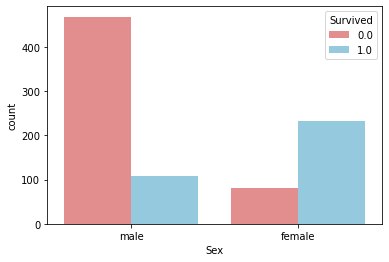

In [5]:
display(df_data[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().round(3))
sns.countplot(df_data['Sex'], hue=df_data.Survived, palette=['lightcoral', 'skyblue'])

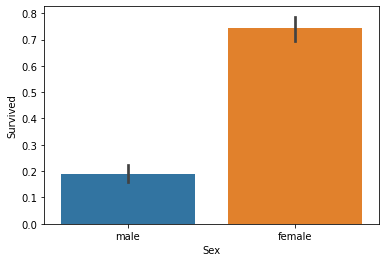

In [6]:
sns.barplot(x='Sex', y='Survived', data = df_data)
plt.show()

,Pclass,Survived
0,1,0.630
1,2,0.473
2,3,0.242


C:\Users\chiay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

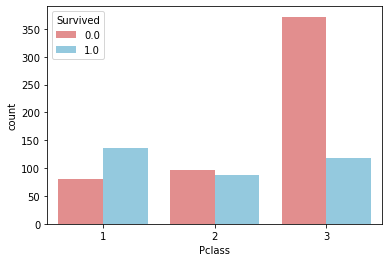

In [7]:
display(df_data[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().round(3))
sns.countplot(df_data['Pclass'], hue=df_data.Survived, palette=['lightcoral', 'skyblue'])

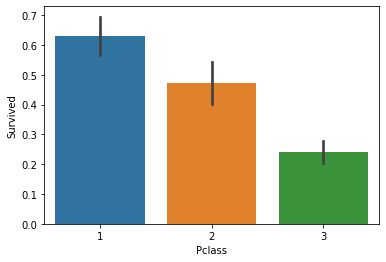

In [8]:
sns.barplot(x='Pclass', y='Survived', data = df_data)
plt.show()

In [9]:
df_data['Fare'].fillna(df_data['Fare'].median(), inplace = True)

In [10]:
label = LabelEncoder()
df_data['Fare_bin'] = pd.qcut(df_data['Fare'],5)
df_data['Fare_bin'] = label.fit_transform(df_data['Fare_bin'])
df_data['Fare_bin']

0      0
1      4
2      1
3      4
4      1
      ..
413    1
414    4
415    0
416    1
417    3
Name: Fare_bin, Length: 1309, dtype: int32

,Fare_bin,Survived
0,0,0.218
1,1,0.201
2,2,0.427
3,3,0.443
4,4,0.645


C:\Users\chiay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare_bin', ylabel='count'>

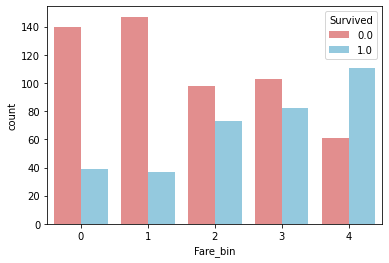

In [11]:
display(df_data[['Fare_bin','Survived']].groupby(['Fare_bin'], as_index=False).mean().round(3))
sns.countplot(df_data['Fare_bin'], hue=df_data.Survived, palette=['lightcoral', 'skyblue'])

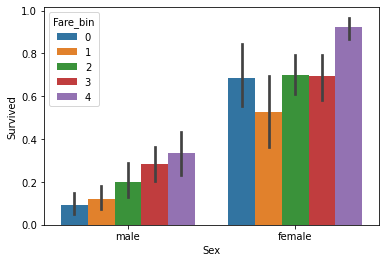

In [12]:
sns.barplot(x='Sex', y='Survived', data=df_data, hue='Fare_bin')
plt.show()
# fig, ax = plt.subplots(figsize=(15,5))
# ax = sns.barplot(x="Sex", y="Survived", data=df_train, hue="Pclass");
# plt.xticks(rotation=0)
# plt.title("Percentage of survived by gender")
# plt.show()

In [13]:
#擷取Name裡的稱謂(Title)

df_data['Title'] = df_data.Name.str.split(', ', expand=True)[1]
df_data['Title'] = df_data.Title.str.split('.', expand=True)[0]
df_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [14]:
# 計算每個 Title 的年齡平均值
Age_Mean = df_data[['Title','Age']].groupby( by=['Title'] ).mean()
Age_Mean.columns = ['Age Mean']
Age_Mean.reset_index( inplace=True )

display( Age_Mean )

,Title,Age Mean
0,Capt,70.000000
1,Col,54.000000
2,Don,40.000000
3,Dona,39.000000
4,Dr,43.571429
5,Jonkheer,38.000000
6,Lady,48.000000
7,Major,48.500000
8,Master,5.482642
9,Miss,21.774238


In [15]:
df_data["boy"] = df_data["Name"].apply(lambda x: 1 if ("Master." in x.split(" ")[1:-1]) else 0)

In [54]:
df_data["elder"] = df_data["Name"].apply(lambda x: 1 if ("Capt." in x.split(" ")[1:-1]) else 0)
df_data["elder"] 

0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    0
415    0
416    0
417    0
Name: elder, Length: 1309, dtype: int64

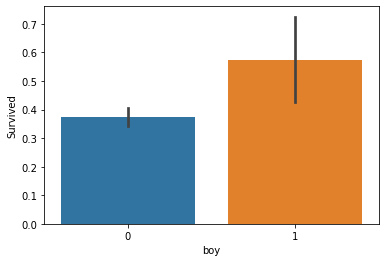

In [16]:
sns.barplot(x='boy', y='Survived', data=df_data)
plt.show()

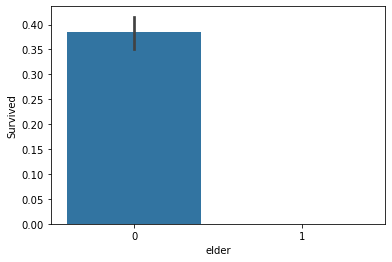

In [53]:
sns.barplot(x='elder', y='Survived', data=df_data)
plt.show()

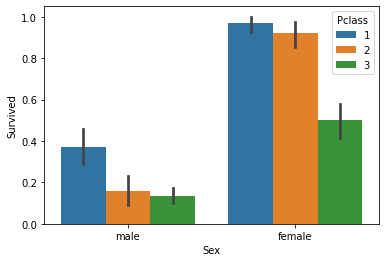

In [17]:
sns.barplot(x='Sex', y='Survived', data=df_data, hue='Pclass')
plt.show()

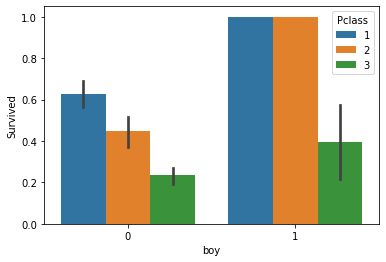

In [18]:
sns.barplot(x='boy', y='Survived', data=df_data, hue='Pclass')
plt.show()

In [19]:
df_data['w_F4'] = 0
df_data.loc[(df_data.Sex == 'female') & (df_data.Fare_bin == 4), 'w_F4'] = 1
df_data['w_F4']

0      0
1      1
2      0
3      1
4      0
      ..
413    0
414    1
415    0
416    0
417    0
Name: w_F4, Length: 1309, dtype: int64

In [20]:
df_data['w_class1_2'] = 0
df_data.loc[(df_data.Sex == 'female') & (df_data.Pclass == 1), 'w_class1_2'] = 1
df_data.loc[(df_data.Sex == 'female') & (df_data.Pclass == 2), 'w_class1_2'] = 1
df_data['w_class1_2']

0      0
1      1
2      0
3      1
4      0
      ..
413    0
414    1
415    0
416    0
417    0
Name: w_class1_2, Length: 1309, dtype: int64

In [21]:
df_data['boy_class1_2'] = 0
df_data.loc[(df_data.boy == 1) & (df_data.Pclass == 1), 'boy_class1_2'] = 1
df_data.loc[(df_data.boy == 1) & (df_data.Pclass == 2), 'boy_class1_2'] = 1
df_data['boy_class1_2'].unique()

array([0, 1], dtype=int64)

#### Family_Size

In [33]:
df_data["family_size"] = 1 + df_data["SibSp"] + df_data["Parch"]

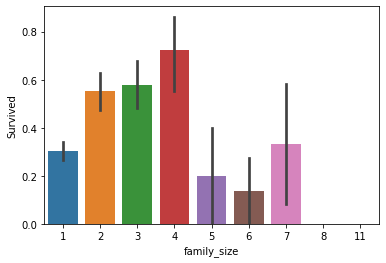

In [35]:
sns.barplot(x='family_size', y='Survived', data=df_data)
plt.show()

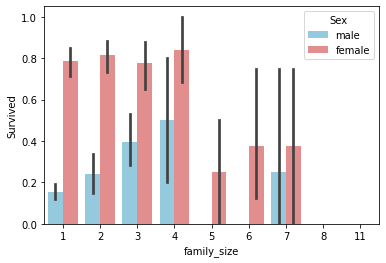

In [42]:
sns.barplot(x='family_size', y='Survived', data=df_data, hue='Sex', palette=['skyblue', 'lightcoral'])
plt.show()

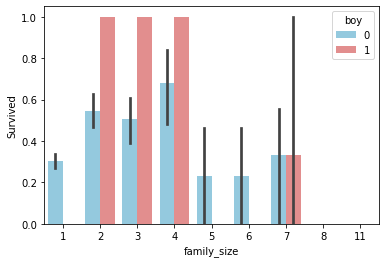

In [44]:
sns.barplot(x='family_size', y='Survived', data=df_data, hue='boy', palette=['skyblue', 'lightcoral'])
plt.show()

In [43]:
df_data[['family_size','Survived']].groupby(['family_size'], as_index=False).mean().round(3)

,family_size,Survived
0,1,0.304
1,2,0.553
2,3,0.578
3,4,0.724
4,5,0.200
5,6,0.136
6,7,0.333
7,8,0.000
8,11,0.000


#### Age 

In [45]:
#把遺失部分填入0
df_data['isAge'] = df_data['Age'].isnull().map( lambda x:0 if x==True else 1 )

In [46]:
#觀察缺漏值情況
display( pd.crosstab( df_data.isAge, df_data.Sex, margins=True ) )
display( pd.crosstab( df_data.isAge, df_data.Pclass, margins=True ) )

Sex,female,male,All
isAge,,,
0,78,185,263
1,388,658,1046
All,466,843,1309


Pclass,1,2,3,All
isAge,,,,
0,39,16,208,263
1,284,261,501,1046
All,323,277,709,1309


C:\Users\chiay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Counts')

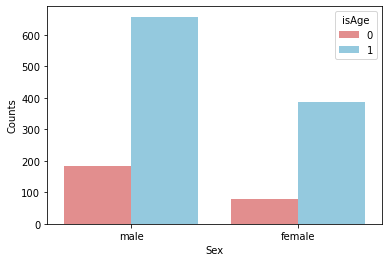

In [49]:
sns.countplot(df_data['Sex'], hue=df_data['isAge'], palette=['lightcoral','skyblue'])
plt.ylabel('Counts') 

C:\Users\chiay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Counts')

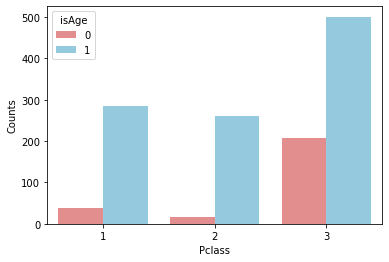

In [50]:
sns.countplot(df_data['Pclass'], hue=df_data['isAge'], palette=['lightcoral','skyblue'])
plt.ylabel('Counts') 

# 以名字分類 

In [36]:
df_data["surname"] = df_data["Name"].apply(lambda x: x.split(",")[0])

In [40]:
# Copy family name to create a "woman child group" based on the surname
df_data["g_surname"] = df_data["surname"].copy()

#create new dataframe
data_g_name = df_data.copy()
data_g_name["g_surname_famsize"] = 1


columns = {'Survived': 'surviver_num', 'g_surname_famsize':'g_name_famsize'}
data_g_name = data_g_name.groupby("g_surname").agg({'Survived':'sum', 'g_surname_famsize':'count'}).reset_index().rename(columns=columns)
data_g_name

,g_surname,surviver_num,g_name_famsize
0,Abbing,0.0,1
1,Abbott,1.0,3
2,Abelseth,0.0,2
3,Abelson,1.0,2
4,Abrahamsson,0.0,1
...,...,...,...
870,de Mulder,1.0,1
871,de Pelsmaeker,0.0,1
872,del Carlo,0.0,2
873,van Billiard,0.0,3


# 產生訓練測試集

In [22]:
cols = ['w_F4', 'w_class1_2','boy_class1_2']

In [23]:
# 產生訓練集和測試集
Train = df_data[ pd.notnull(df_data.Survived) ]
Test = df_data[ pd.isnull(df_data.Survived) ]

# 訓練集刪除 PassengerId 欄位；
# 測試集刪除 PassengerId 與 Survived 欄位
Train.drop( ['PassengerId'], axis=1, inplace=True )
Test.drop( ['PassengerId','Survived'], axis=1, inplace=True )

# 將訓練集中的標籤欄位 Survived 單獨拆出
y = Train.Survived
X = Train.drop( ['Survived'], axis=1 )
X = Train[cols]

C:\Users\chiay\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_Vali, y_train, y_Vali = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train.shape, X_Vali.shape, y_train.shape , y_Vali.shape

((712, 3), (179, 3), (712,), (179,))

# GridSearchCV

In [25]:
params = {
 'learning_rate': [0.01, 0.05, 0.1],
 'max_depth': [2, 3],
 'n_estimators': [5,10,15,20],
 'n_jobs': [-1],
}

In [26]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
xgb_clf = xgb.XGBClassifier()
gridsearch = GridSearchCV(xgb_clf
                          , param_grid=params
                          , scoring="accuracy"
                          , cv=kf
                          , return_train_score=True)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, mono...=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                    

In [27]:
display(gridsearch.best_params_)

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 5, 'n_jobs': -1}

In [29]:
xgbc = xgb.XGBClassifier(n_estimators=5
                    ,objective='binary:logistic'
                    ,max_depth=2
                    ,learning_rate=0.01
                    ,n_jobs=-1)
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
folds = KFold(n_splits=5, shuffle=True)
scores_train = cross_val_score(xgbc, X_train, y_train, cv=folds )
scores = cross_val_score(xgbc, X_Vali, y_Vali, cv=folds )
scores, scores.mean(), scores_train.mean()

(array([0.75      , 0.72222222, 0.77777778, 0.80555556, 0.85714286]),
 0.7825396825396825,
 0.8019994090416626)

# 提交檔案

In [32]:
xgb_pred = xgbc.predict(Test[cols])

# 提交檔案

submit = pd.DataFrame(df_test['PassengerId'])
submit['Survived'] = pd.DataFrame(xgb_pred.astype(int))
submit.to_csv( 'Titanic_xgb_Result.csv', index=False )
print( f'預測結果：' )
submit

預測結果：


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
